# Principal Component Analysis

In this section, I explore what is perhaps one of the most broadly used of unsupervised algorithms, principal component analysis (PCA). PCA is fundamentally a dimensionality reduction algorithm, but it can also be useful as a tool for visualization, noise filtering, feature extraction and engineering, and much more.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 1. Introducing Principal Component Analysis

The principal component analysis is an orthogonal linear transformation, "principal components" that transfers the data to a new coordinate system. It can be used to reduce dimensions of data without much loss of information.

**In principal component analysis, it provides a list of the principal components that keeps the largest variance by any projection of data to describe how the original data is distributed.**

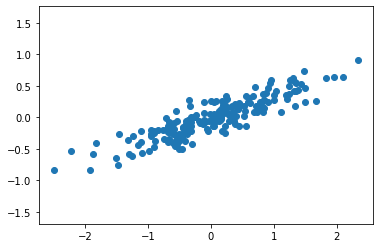

In [2]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [4]:
print("Componenets \n", pca.components_)

print("Explanined Variance \n", pca.explained_variance_)

Componenets 
 [[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]
Explanined Variance 
 [0.7625315 0.0184779]


Let's visualize them as vectors over the input data, using the "components" to define the direction of the vector, and the "explained variance" to define the squared-length of the vector:

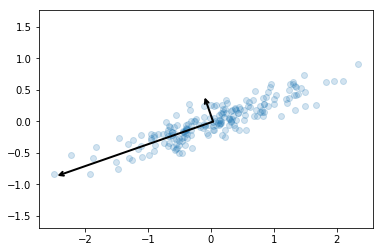

In [10]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

Mapping to a new coordinate system and visualize the transformed data

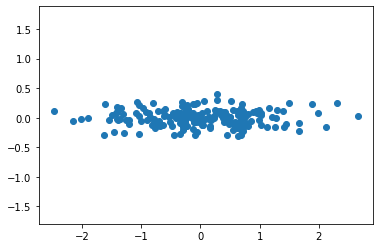

In [5]:
X_trans = pca.transform(X)
plt.scatter(X_trans[:, 0], X_trans[:, 1])
plt.axis('equal');

## 2. Mathematics Behind PCA

In [11]:
data = pd.read_csv('../../Data/Test_Scores.csv')
data

,ACT,FinalExam,QuizAvg,TestAvg
0,33,181,95,89
1,31,169,81,89
2,21,176,65,68
3,25,181,66,90
4,29,169,89,81
5,24,103,61,57
6,25,150,81,76
7,29,147,86,76
8,36,181,98,102
9,26,163,72,70


### 2.1. Standardize Data

In [21]:
data_std = (data - data.mean()) / data.std()
print('Standardized Data: \n')
data_std

Standardized Data: 



,ACT,FinalExam,QuizAvg,TestAvg
0,1.270931,0.940813,1.304131,0.952737
1,0.790038,0.481346,0.285766,0.952737
2,-1.614426,0.749368,-0.878080,-0.638767
3,-0.652640,0.940813,-0.805340,1.028523
4,0.309145,0.481346,0.867689,0.346450
5,-0.893087,-2.045721,-1.169041,-1.472411
6,-0.652640,-0.246143,0.285766,-0.032480
7,0.309145,-0.361010,0.649467,-0.032480
8,1.992270,0.940813,1.522352,1.937953
9,-0.412194,0.251613,-0.368898,-0.487195


### 2.2. Compute the covariance matrix of the whole dataset

In [23]:
X = np.matrix(data)
cov = (X.T * X) / X.shape[0]
cov

matrix([[  784.14285714,  4369.21428571,  2179.92857143,  2154.35714286],
        [ 4369.21428571, 25103.28571429, 12222.85714286, 12210.28571429],
        [ 2179.92857143, 12222.85714286,  6115.5       ,  6016.57142857],
        [ 2154.35714286, 12210.28571429,  6016.57142857,  6003.        ]])

### 2.3. Compute Eigenvectors and corresponding Eigenvalues

In [26]:
U, S, V = np.linalg.svd(cov)
print(pd.DataFrame(U))
      
print(pd.DataFrame(S))
      
print(pd.DataFrame(V))

          0         1         2         3
0 -0.142617  0.256181  0.083112 -0.952431
1 -0.813946 -0.539614 -0.211119 -0.041686
2 -0.398992  0.762910 -0.456162  0.225144
3 -0.397439  0.247298  0.860487  0.201119
              0
0  37822.544854
1    152.434219
2     25.806567
3      5.142932
          0         1         2         3
0 -0.142617 -0.813946 -0.398992 -0.397439
1  0.256181 -0.539614  0.762910  0.247298
2  0.083112 -0.211119 -0.456162  0.860487
3 -0.952431 -0.041686  0.225144  0.201119


### 2.4. Transform the Data onto the new subspace

Now, I have the principal components (matrix U), we can use these to project the original data into a lower-dimensional space. Implementing a function that computes the projection and selects only the top K components, effectively reducing the number of dimensions.

In [30]:
def project_data(X, U, k):
    U_reduced = U[:,:k]
    return pd.DataFrame(np.dot(X, U_reduced))

In [32]:
z = project_data(data_std, U, 2)
z

,0,1
0,-1.846020,1.048457
1,-0.997135,0.396275
2,0.224517,-1.645817
3,-0.760144,-1.034921
4,-0.919773,0.567101
5,2.844107,-0.380890
6,0.192315,0.175609
7,0.003529,0.761456
8,-2.427527,1.643376
9,0.194804,-0.643288


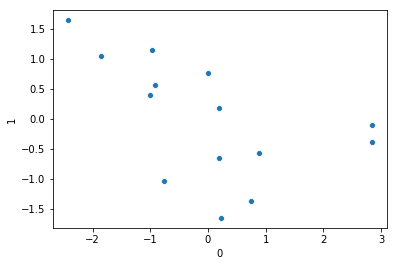

In [39]:
sns.scatterplot(z.iloc[:, 0], z.iloc[:, 1])
plt.show()

### 2.5. Transform back onto the old subspace

In [42]:
def recover_data(Z, U, k):
    U_reduced = U[:,:k]
    return pd.DataFrame(np.dot(Z, U_reduced.T))

In [43]:
data_recovered = recover_data(z, U, 2)
data_recovered

,0,1,2,3
0,0.531869,0.936798,1.536426,0.992961
1,0.243727,0.597779,0.700171,0.494298
2,-0.453648,0.705361,-1.345191,-0.496238
3,-0.156718,1.177174,-0.486260,0.046177
4,0.276456,0.442630,0.799629,0.505796
5,-0.503195,-2.109416,-1.425361,-1.224552
6,0.017560,-0.251295,0.057242,-0.033006
7,0.194568,-0.413765,0.579515,0.186904
8,0.767209,1.089087,2.222312,1.371196
9,-0.192581,0.188567,-0.568496,-0.236506
